This is the <a href="https://jupyter.org/">Jupyter Notebook</a>, an interactive coding and computation environment. For this lab, you do not have to write any code, you will only be running it. 

To use the notebook:
- "Shift + Enter" runs the code within the cell (so does the forward arrow button near the top of the document)
- You can alter variables and re-run cells
- If you want to start with a clean slate, restart the Kernel either by going to the top, clicking on Kernel: Restart, or by "esc + 00" (if you do this, you will need to re-run the following block of code before running any other cells in the notebook) 

In [1]:
%matplotlib inline
from em_examples.DipoleWidgetTD import DipoleWidgetTD, InteractiveDipoleProfileTD, InteractiveDipoleDecay
from em_examples.VolumeWidget import InteractivePlanes, plotObj3D

# Title: Electrical Dipole in a Whole-space (time domain)

# Purpose

By using an analytic solution electromagnetic (EM) fields from electrical dipole in a Whole-space, we present some fundamentals of EM responses in the context of crosswell EM survey. 

#  Set up

For time domain EM method using galvanic source, we inject step-off currents to the earth through electrodes.

## Crosswell EM geometry

Here, we choose geometric parameters for a crosswell EM set-up having two boreholes for Tx and Rx. In the Tx hole, a VED source is located at (0m, 0m, 0m), and it is fixed. Horizontal location of the Rx hole is fixed to 50m apart from the source location in x-direction.  


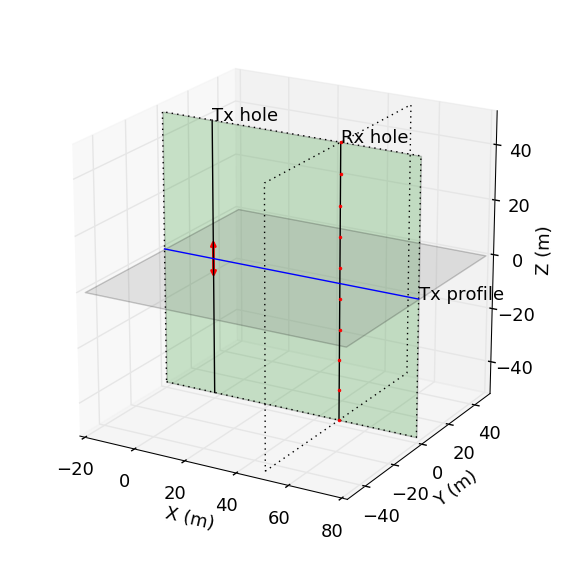

In [2]:
ax = plotObj3D()

## Backgrounds 

When using crosswell electromagnetic (EM) survey, we inject step-off currents to the earth using (+) and (-) current electrodes, and measure voltages between potential electrodes in the off-time, when DC effects are disappeared. A common goal here is imaging conductivity structure of the earth by interpreting measured voltages. However, to accomplish that task well, we first need to understand physical behavior of EM responses for the given survey set-up. 

Assuming length of the current elecrodes are small enough, this can be assumed as electrical dipole (ED). For a croswell set-up, let we have a vertical magnetic dipole (VMD) source in a homogeneous earth with step-off currents, then we can have analytic solution of EM fields in time domain (WH1988). Solution of of arbitrary EM fields, $\mathbf{f}$, will be a function of 

$$ \mathbf{f} (x, y, z; \sigma, t),$$ 

where $\sigma$ is conductivity of homogenous earth (S/m), and $f$ is transmitting frequency (Hz). Here $\mathbf{f}$ can be electic ($\mathbf{e}$) or magnetic field ($\mathbf{h}$), or current density ($\mathbf{j}$). <strong>Now, you will explore how EM responses behaves as a function of space, $\sigma$, and $t$ for the given crosswell EM set-up  </strong>. 

#  Geometry app

Here, we choose geometric parameters for a crosswell EM set-up having two boreholes for Tx and Rx. In the Tx hole, a VED source is located at (0m, 0m, 0m), and it is fixed. Horizontal location of the Rx hole is fixed to 50m apart from the source location in x-direction.  

## Parameters

- plane: Choose either "XZ" or "YZ" plane
- offset: Offset from a source plane (m)
- nRx: The number of receivers in the Rx hole

Chosen geometric parameters will be used in the Electric Dipole widget below. 

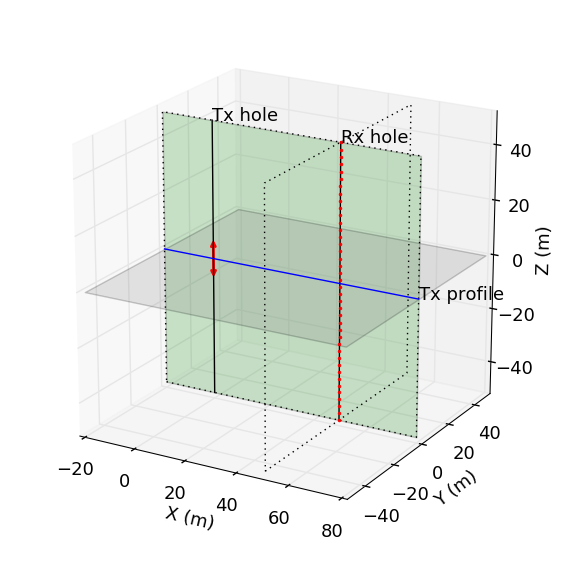

In [3]:
Q0 = InteractivePlanes(planevalue="XZ", offsetvalue=0.); Q0

# Electric Dipole app

Explore behavior of EM fields, $\mathbf{f} (x, y, z; \sigma, t)$ on 2D plane chosen in the above app. And also at the receiver locations. 


## Parameters:

- Field: Type of EM fields ("E": electric field, "H": magnetic field, "J": current density)
- AmpDir: Type of the vectoral EM fields 

    None: $f_x$ or $f_y$ or $f_z$
    
    Amp: $\mathbf{f} \cdot \mathbf{f} = |\mathbf{f}|^2$
    
    Dir: A vectoral EM fields, $\mathbf{f}$
    
- Comp.: Direction of $\mathbf{F}$ at Rx locations        
- $t$: time after current switch-off 
- $\sigma$: Conductivity of homogeneous earth (S/m)
- Offset: Offset from a source plane
- Scale: Choose "log" or "linear" scale 
- Slider: When it is checked, it activates "flog" and "siglog" sliders above. 
- TimeLog: A float slider for log10 time (only activated when slider is checked) 
- SigLog: A float slider for log10 conductivity (only activated when slider is checked)


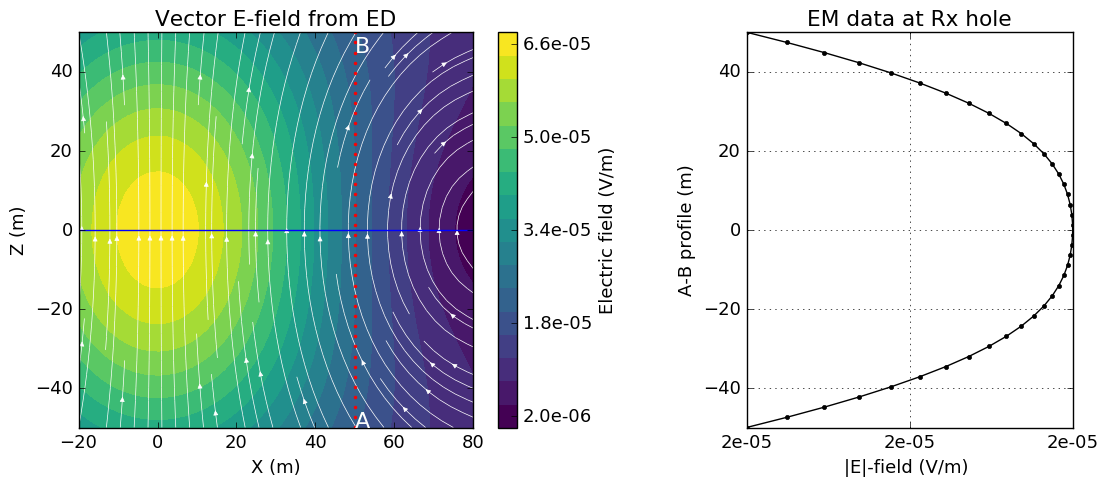

In [4]:
dwidget = DipoleWidgetTD()
Q1 = dwidget.InteractiveDipoleBH(nRx=Q0.kwargs["nRx"], plane=Q0.kwargs["Plane"], offset_plane=Q0.kwargs["Offset"]); Q1

# Proflie app

Here we focuson data, which can be measured at receiver locations. We limit our attention to three different profile shown in **Geometry** app: Rxhole (red), Txhole (black), TxProfile (blue). 

## Parameters:

- Comp.: Direction of $\mathbf{F}$ at Rx locations        
- ComplexNumber: Type of complex data ("Re", "Im", "Amp", "Phase")
- $t_1$: Time (sec)
- $t_2$: Time (sec)
- $t_3$: Time (sec)
- Profile: Type of profile line ("Rxhole", "Txhole", "TxProfile")
- Scale: Choose "log" or "linear" scale 
- Rx#: choice of Rx point for the following Sounding app

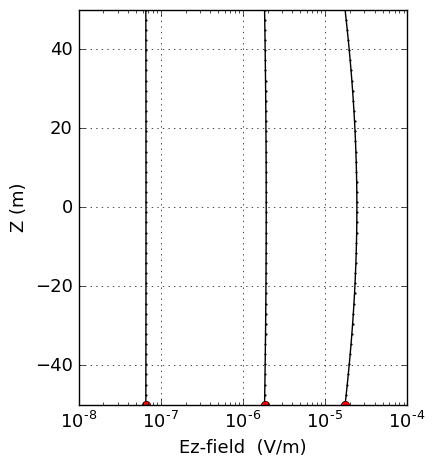

In [5]:
Q2 = InteractiveDipoleProfileTD(dwidget, Q1.kwargs["Sigma"], Q1.kwargs["Field"], Q1.kwargs["Component"], Q1.kwargs["Scale"]); Q2

# Sounding app

## Parameters:

- Comp.: Direction of $\mathbf{F}$ at Rx locations        
- $\sigma$: Conductivity of homogeneous earth (S/m)
- Scale: Choose "log" or "linear" scale 

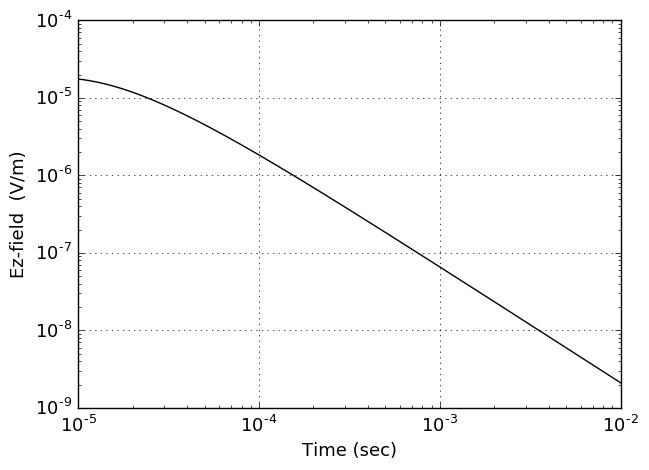

In [6]:
InteractiveDipoleDecay(dwidget, dwidget.dataview.xyz_line[Q2.kwargs["irx"],:], Q1.kwargs["Field"], Q1.kwargs["Component"])